# Lecture 3a: Classification

In [7]:
import sys

assert sys.version_info >= (3, 7)

In [8]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [10]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Recap of Lecture 2

Regression using Scikit-Learn Models.
Here we perform regression on the California Housing dataset, but with no data visualisation and simplified data processing.

This dataset is slightly different from the one explored previously - it has 8 numeric attributes and no categorical attributes.

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

`housing` is a dictionary. Some attributes include:
- `housing.data`: ndarray shape (20640, 8). Each row corresponds to the 8 feature values in order.
- `housing.target`: numpy array shape  (20640, 1). Each value corresponds to the house value in units of 100,000.
- `housing.feature_names`: list of length 8
- look at documentation for more details

In [12]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
pipeline = make_pipeline(StandardScaler(), rf_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5073035553147772

In [15]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5053326657968666

# Classification

Train and evaluate model on MNIST dataset. First, we will use Scikit-Learn models, and then move on to neural networks

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist.DESCR)

C:\Users\wengl\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [17]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [18]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [19]:
print(y.shape)
y

(70000,)


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

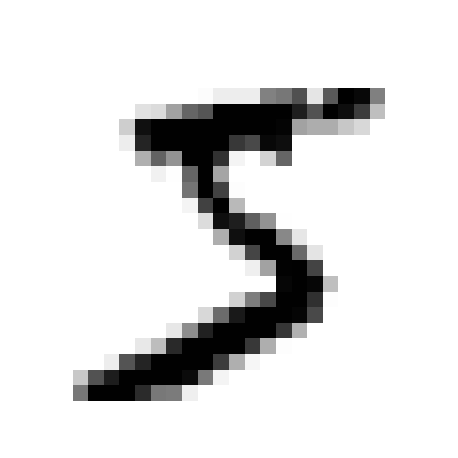

In [20]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")
plt.show()

In [21]:
y[0]

'5'

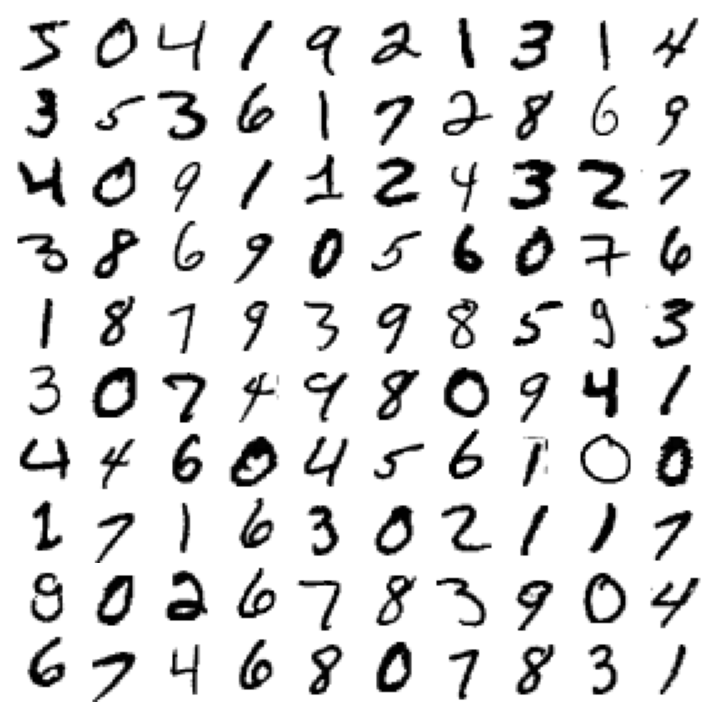

In [22]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, idx + 1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

Here, we split the dataset into a train and test set. The training set contains the first 60,000 examples, and the test set contains the last 10,000 examples.

In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

Let's simplify the probelm and try to identify one digit. For example, we will try to determine whether each handwritten digit is a '5' or not. This is an example of binary classification, as we are distinguishing between 2 classes only ('5' and non-'5'). First, we'll create the target vectors for this classification task:

In [24]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Now, let's pick a classifier and train it. A good place to start is with a stochastic gradient descent (SGD) classifier. This classifier is capable of handling large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time. Let's create an `SGDClassifier` and train it on the whole training set:

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

The classifier predicts that this image is a '5' (`True`). In this instance, its prediction is correct! Now, let's evaluate its performance.

## Classification Performance Measures

Evaluating a classifier is often trickier than evaluating a regressor, so we will spend some time on this topic.

### Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross-validation, just like we did in Lecture 2. Let's use the `cross_val_score()` function to evaluate our `SGDClassifier` model, using k-fold cross-validation with 3 folds. Remember, k-fold cross-validation means splitting the training set into k folds (in this case, 3), then training the model k times, holding out a different fold each time for evaluation:

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn't it? Well, before you get too excited, let's look at a dummy classifier that just classifies every single image in the most frequent class, which in this case is the negative class (i.e., non 5):

In [28]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # prints False: it predicts everything as not a 5

False


In [29]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

That's right, it has over 90% accuracy! This is simply because only about 10% of the images are 5, so if you always guess that an image is **not** a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance metric for classifiers, especially when you are dealing with **skewed** datasets (i.e., when some classes are much more frequent than others). A much better way to evaluate the performance of a classifier is to look at the **confusion matrix** (CM).

### Confusion Matrices

The general idea of a confusion matrix is to count the number of times instances of class A are classified as class B, for all A-B pairs. For example, to know the number of times the classifier confused images of 8s with 0s, you would look at row #8, column #0 of the confusion matrix.

To compute the confusion matrix, we need to have a set of predictions so that they can be compared to the actual targets. We can use the `cross_val_predict()` function for this purpose (cross-validation is done on the training set, so that the test set remains untouched):

In [30]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the `cross_val_score()` function, `cross_val_predict()` performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean (out-of-sample) prediction for each instance in the training set.

Now we are ready to get the confusion matrix using the `confusion_matrix()` function. Just pass it the target classes and the predicted classes (`y_train_5` and `y_pred_5` respectively):

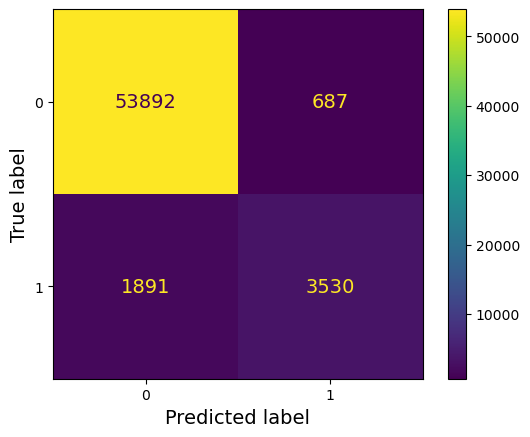

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_train, y_pred):
  cm = confusion_matrix(y_train, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

plot_confusion_matrix(y_train_5, y_train_pred)

Label 0 represents the negative class (digit is not '5'), whilst label 1 represent the positive class (digit is a '5').

Looking at the first row of the matrix, it tells us the 53,892 of examples were correctly classified as not a '5' (true negative), whilst 687 were wrongly classified as '5's (false positive; type I error).

The second row considers the images of '5's (positive class). 1,891 were wrongly classified as non-5s (false negatives; type II errors), while the remaining 3,530 were correcly classified as '5's (true positives).

A perfect classifier would only have true positives and true negatives, so its confusion matrix would only have non-zero values on its main diagonal:

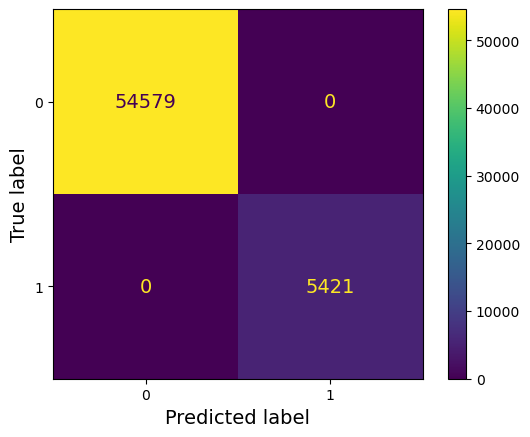

In [32]:
# classifier that predicts all labels correctly
plot_confusion_matrix(y_train_5, y_train_5)

The confusion matrix gives us alot of information, but sometimes we prefer a more concise metric. Here, we introduce three metrics - precision, recall and f1 score.

Precision:
$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

Recall:
$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

F1 Score:
$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# precision and recall of SGDClassifier
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}")

Precision: 0.837
Recall: 0.651
F1: 0.733


Now our '5'-detector does not look as shiny as it did when we looked at its accuracy. When it claims an image represents a '5', it is correct only 83.7% of the time. Moreover, it only detects 65.1% of the '5's.

It is often convenient to combine the precision and recall into a single metric called the _F1 score_, especially when you need a single metric to compare two classifiers. The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

The F1 score favours classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in others you really care about recall:

- Classifier to detect videos that are safe for kids
  - Prefer a classifier that rejects many good videos (low recall)
  - Keeps only safe videos (high precision)
- Classifier to detect shoplifters in surveillance images
  - Prefer a classifier that is triggers an alert easily, so all the shoplifters get caught (high recall)
  - There will be false alerts (low precision)

### The Precision/Recall Trade-off

In [34]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

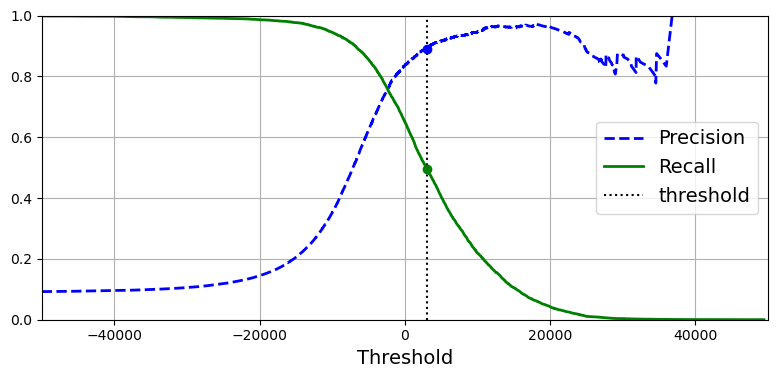

In [39]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

Referring to the figure above, at a threshold of 3000, the precision is near 90% and recall is around 50%. Another way to select a good precision/recall trade-off is to plot precision directly against recall, as shown in the figure below:

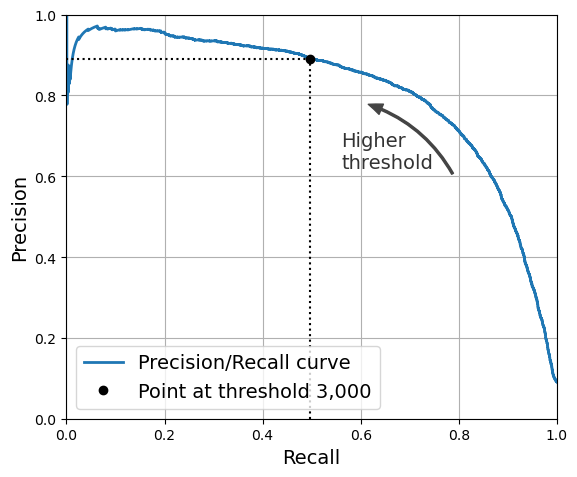

In [40]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

You can see that the precision starts to fall sharply at around 80% recall. You will probably want to select a precision/recall trade-off just before that drop - for example, at around 60% recall. Of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. You should use the first plot to find the threshold you need to use, but that's not very precise. Alternatively, you can search for the lowest threshold that gives you at least 90% precision. For this, you can use the NumPy array's `argmax()` method. This returns the first index of the maximum value, which in this case means the first `True` value:

In [41]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439594

Let's make predictions on the training set (instead of using the classifier's `predict()` method, we run this code to use the custom threshold):

In [42]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [44]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you're done. But wait, not so fast - a high-precision classifier is not very useful if its recall is too low! For many applications, 48% recall wouldn't be great at all.

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive.

To plot the ROC curve, we use the `roc_curve()` function to compute the TPR and FPR for various threshold values:

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Next, we plot the FPR against the TPR using Matplotlib. To find the point that corresponds to 90% precision, we need to look for the index of the desired threshold. Since thresholds are listed in decreasing order in this case, we use <= instead of >= on the first line:

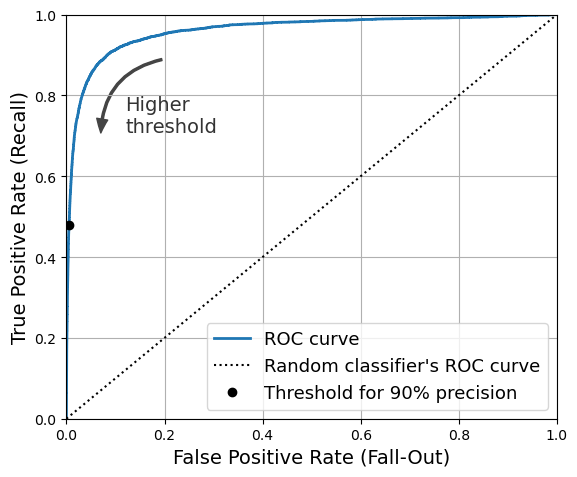

In [46]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from the line as possible (toward the top-left corner).

One way to comapre classifiers is to measure the area under the curve (AUC). A perfect classifier wil have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to estimate the ROC AUC:

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let's now create a `RandomForestClassifier` and compare its PR curve and F1 score to those of the `SGDClassifier`:

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [49]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method='predict_proba')

In [50]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [51]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

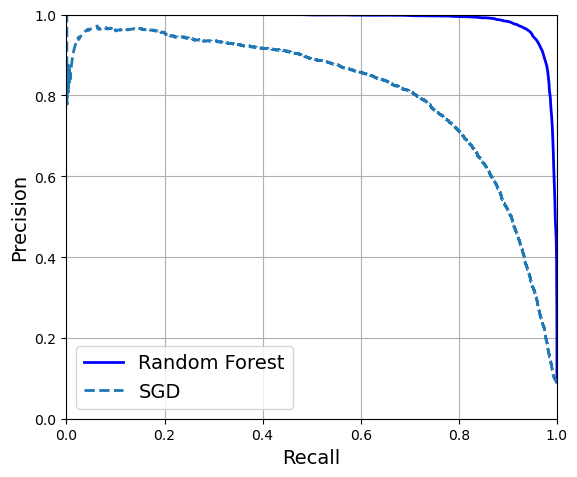

In [52]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

The figure above shows that the Random Forest has a better PR curve than the SGDClassifier - it comes much closer to the top-right corner. It's F1 score and ROC AUC score are also significantly better:

In [53]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [55]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [56]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall trade-off that fits your needs, and use several metrics and curves to compare various models. You're ready to try and detect more than just the 5s.

## Multiclass Classificaiton

Whereas binary classifiers distinguish between two classes, multiclass classifiers can distinguish between more than two classes.

Some Scikit-Learn classifiers (e.g., `LogisticRegression`, `RandomForestClassifier`, and `GaussianNB`) are capable of handling multiple classes natively. Others are strictly binary classifiers (e.g., `SGDClassifier` and `SVC`). However, there are two strategies that allow us to use binary classifiers to perform multiclass classification:
1. **One-Versus-All (OvA)**: train ten binary classifiers: one for each digit (digit '0' or not digit '0', digit '1' or not digit '1', and so on). When making a predicition, we get the decision score from each classifier and choose the prediction with the highest score.
2. **One-Versus-One (OvO)**: If there are N classes, train $N*(N-1) / 2$ classifiers. For the MNIST dataset, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.

Some algorithms (like support vector machine classifiers) scale poorly with the size of the training set. For these algorithms, OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvR or OvO, depending on the algorithm. Let's try this with a support vector machine classifier using the `sklearn.svm.SVC` class. We'll only train on the first 2000 images, or it will take a very long time:

In [57]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

That was easy! We trained the `SVC` using the original target classes from 0 to 9 (`y_train`), instead of the '5' or 'not 5' target classes (`y_train_5`). Since there are 10 classes (more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers. Now let's make a prediction on an image:

In [58]:
svm_clf.predict([some_digit]) # correct label: '5'

array(['5'], dtype=object)

That's correct! This code actually made 45 predictions - one per pair of classes - and it selected the class that won the most duels. If you call the `decision_function()` method, you will see that it returns 10 scores per instance: one per class. Each class gets a score equal to the number of won duels plus or minus a small tweak (max +- 0.33) to break ties, based on the classifier scores:

In [59]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

The highest score is 9.3, and it's indeed the one corresponding to class 5:

In [60]:
class_id = some_digit_scores.argmax()
class_id

5

when the classifier is trained, it stores the list of target classes in its `classes_` attribute, ordered by value. In the case of MNIST, the index of each class in the `classes_` array conveniently matches the class itself (e.g., the class at index 5 happens to be class '5'), but in general you won't be so lucky; you will need to look up the class label like this:

In [61]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [62]:
svm_clf.classes_[class_id]

'5'

In [63]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

If you want to force Scikit-Learn to use one-versus-one or one-verus-rest, you can use the `OneVsOneClassifier` or `OneVsRestClassifier` classes. Simply create an instance and pass a classifier to its constructor (it doesn't have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC:

In [64]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [65]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [66]:
# check number of trained classifiers
len(ovr_clf.estimators_)

10

Training an `SGDClassifier` on a multiclass dataset and using it to make predictions is just as easy:

In [67]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

Oops, that's incorrect. Prediction errors do happen! This time, Scikit-Learn used the OvR strategy under the hood: since there are 10 classes, it trained 10 binary classifiers. The `decision_function()` method now returns one value per class. Let's look at the scores that the SGD classifier assigned to each class:

In [68]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

We see that the classifier is not very confident about its prediction: almost all scores are very negative, while class 3 has a score of +1,824, and class 5 is not too far behind at -1,386. Of course, you'll want to evaluate this classifier on more than one image. Since there are roughly the same number of images in each class, the accuracy metric is fine. As usual, you can use the `cross_val_score()` function to evaluate the model:

In [69]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

It gets 85.8% on all test folds. If you used a random classifier, it would get 10% accuracy, so this is not such a bad score, but you can still do much better. Simply scaling the inputs increases accuracy above 89.1%:

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

If this were a real project, you would now follow the steps in your machine learning project checklist. You'd explore data preparation options, try out multiple models, shortlist the best ones, fine-tune their hyperparameters using `GridSearchCV`. and automate as much as possible. Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyse the types of errors it makes.

First, look at the confusion matrix. For this, you first need to make predictions using the `cross_val_predict()` function; then you can pass the labels and predictions to the `confusion_matrix()` function, just like you did earlier. However, since there are now 10 classes instead of 2, the confusion matrix will contain quite a lot of numbers, and it may be quite hard to read.

A coloured diagran of the confusion matrix is much easier to analyse. To plot such a diagram, use the `ConfusionMatrixDisplay.from_predictions()` function like this:

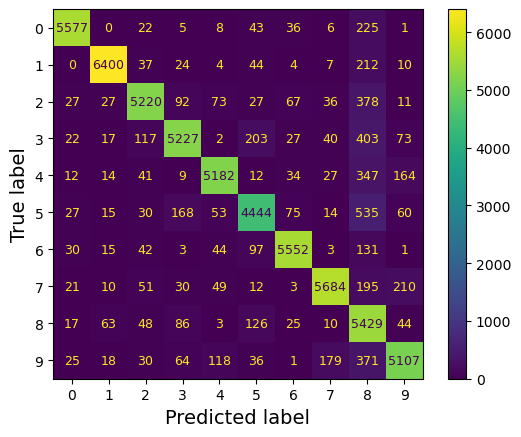

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

This confusion matrix (above) looks pretty good: most images are on the main diagonal, which means that they were classified correctly. Notice that the cell on the diagonal in row #5 and column #5 looks slightly darker than other digits. That's why it's important to normalise the confusion matrix by dividing each value by the total number of images in the corresponding (true) class (i.e., divide by the row's sum). This can be done simply by setting `normalize="true"`. We can also specify the `values_format=".0%` argument to show percentages with no decimals:

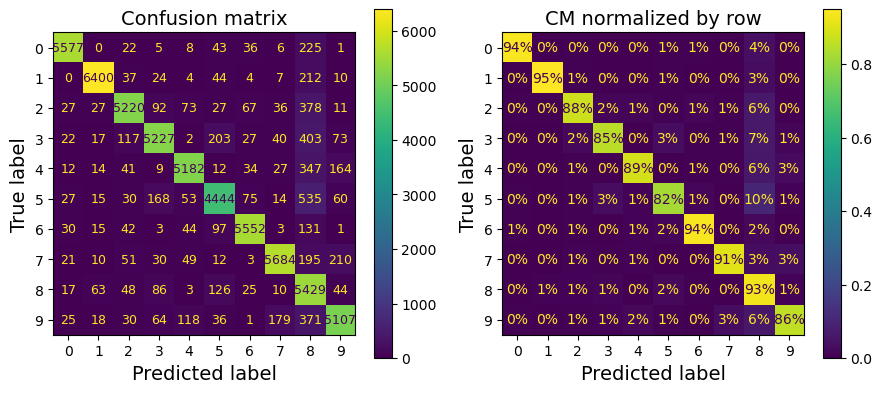

In [72]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

From the figure above on the right, we can easily see that only 82% of images of 5s were classified correctly. The most common error the model made with images of 5s was to misclassify them as 8s; this happened for 10% of all 5s. However, only 2% of 8s got misclassified as 5s; confusion matrices are generally not symmetrical!

To make errors stand out more, we can try putting zero weight on the correct predictions:

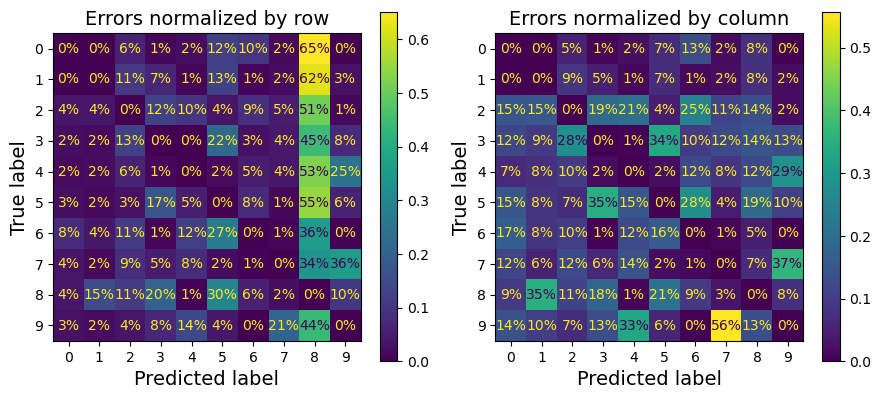

In [73]:
# extra code – this cell generates and saves Figure 3–10
sample_weight = (y_train_pred != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

Now we can see much more clearly the kinds of errors the classifier makes. In the left figure, the column for class 8 is really bright, which confirms that many images got misclassified as 8s. In fact, this is the most common misclassification for almost all cases. Be careful how you interpret the percentages in this diagram: remember that we have excluded the corect predictions. For example, the 36% in row #7, col #9 does **not** mean that 36% of all images of 7s were misclassified as 9s. It means that of all the 7s that were misclassified, 36% were misclassified as 9s. In reality, only 3% of the images of 7s were misclassified as 9s, as you can see in the diagram on the right (2 cells above: CM normalized by row).

It is also possible to normalise the confusion matrix by column rather than by row: if you set the `normalize="pred"`, you get the diagram on the right (above). For example, you can see that 56% of misclassified 7s are actually 9s

**Possible improvements:**
- model misclassifies a lot of examples as '8's:
  - try to gather more data of digits that look like '8' (but are not actually '8').
  - engineer new features like an algorithm to count number of closed loops
  - preprocess the image to make closed loops stand out

- data augmentation (shifting and rotating) to make model more tolerant to variations.

## Multilabel Classification

Example to illustrate multilabel classification. Here, the model outputs two labels:
1. Label for whether digit is large (7, 8, or 9)
2. Label for whether the digit is odd or not

In [74]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [75]:
knn_clf.predict([some_digit])

array([[False,  True]])

The model gets it right! The digit 5 is indeed not large (`False`) and odd (`True`)

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. The following code computes the average F1 score across all labels:

In [76]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

This approach assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than of
Bob or Charlie, you may want to give more weight to the classifier's score on pictures of Alice. One simple option is to give each label a weight equal
to its support (i.e., the number of instances with that target label). To do this, simply set `average="weighted"` when calling the `f1_score()` function.

If you wish to use a classifier that does not natively support multilabel classification, such as `SVC`, one possible strategy is to train one model per
label. However, this strategy may have a hard time capturing the dependencies between the labels. For example, a large digit (7, 8, or 9) is twice more likely to be odd than even, but the classifier for the “odd” label does not know what the classifier for the “large” label predicted. To solve this issue, the models can be organized in a chain: when a model makes a prediction, it uses the input features plus all the predictions of the models that
come before it in the chain.

The good news is that Scikit-Learn has a class called `ChainClassifier` that does just that! By default it will use the true labels for training, feeding each
model the appropriate labels depending on their position in the chain. But if you set the `cv` hyperparameter, it will use cross-validation to get “clean” (out-of-sample) predictions from each trained model for every instance in the training set, and these predictions will then be used to train all the models later in the chain. Here's an example showing how to create and train a `ChainClassifier` using the cross-validation strategy. As earlier, we'll just use the first 2,000 images in the training set to speed things up:

In [77]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [78]:
chain_clf.predict([some_digit])

array([[0., 1.]])

## Multioutput Classification

The last type of classification task we'll discuss is called multioutput-multiclass classification (or just multioutput classification). It is a generalisation of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let's build a system that removes noise from images. It will take as input a noisy digit image, and output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier's output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). Thus, this is an example of a multioutput classification system.

_Note: The line between classification and regression is sometimes blurry, such as in this example.
Arguably, predicting pixel intensity is more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even have a system that outputs multiple labels per instance, including both class labels and value labels._


Let's start by creating the training and test sets by taking MNIST images and adding noise to their pixel intensities with NumPy's `randint()` function. The target images will be the original images:

In [79]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let's take a peek at the first image from the test set. Yes, we're snooping on the test data, so you should be frowning right now.

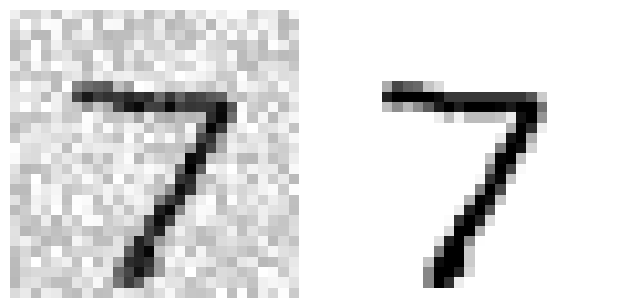

In [80]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

On the left is the noisy input image, and on the right is the clean target image. Now let's train the classifier and make it clean up the image:

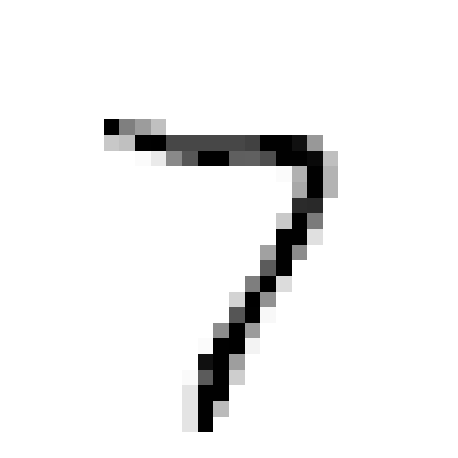

In [81]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

Looks close enough to the target! This concludes our tour of classification. You now know how to select good metrics for classification tasks, pick the
appropriate precision/recall trade-off, compare classifiers, and more generally build good classification systems for a variety of tasks.